## Lighthouse Labs
### W02D2 Machine Learning & Linear Regression

Instructor: Socorro Dominguez  
March 24, 2021

## Agenda
1. Machine Learning
    - Supervised vs. Unsupervised Learning
    
    

2. Supervised Learning 101
    - `X` and `y`
    - Regression vs. Classification    
    - The golden rule: train/test split


3. Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Machine Learning

Machine learning (ML) is all around you.

Do you know some examples?

![img](imgs/0_ml.png)

## Definition of ML / What is ML?

Seen as a subset of AI. ML algorithms build a model based on sample data (training data), in order to make predictions without being explicitly programmed to do so.

A field of study that gives computers the ability to learn without being explicitly programmed.
– Arthur Samuel (1959)

![img](imgs/1_diff.png)

# Types of Machine Learning: Supervised and Unsupervised

## Machine Learning: Supervised Learning
- In supervised learning, we have a set of observations (__*X*__) with an associated response (__*y*__)
- We wish to find a model function that relates __*X*__ to __*y*__
- Then use that model function to predict future observations

<img src='imgs/sup_learning.png' width="700">

## Machine Learning: Unsupervised Learning
- We have __*X*__ (the data) but no __*y*__ (associated response)

<img src='imgs/unsup_learning.png' width="630">

## Supervised Learning 101

Lots of terminology!

For tabular data:
- **examples** = rows = samples = records = instances (usually denoted by $n$)
- **features** = inputs = predictors = explanatory variables = regressors = independent variables = covariates (usually denoted by $d$) = **X**
- **targets** = outputs = outcomes = response variable = dependent variable = labels (if categorical) = **y**
- **training** = learning = fitting

# Types of Supervised Learning: Regression and Classification

## Classification vs. Regression

* Classification problems: predicting among two or more categories, also known as classes
    - Example1: Predict whether a patient has a liver disease or not
    - Example2: Predict whether the letter grade of a student (A,B,C,D or F)
* Regression problem: predicting a continuous (in other words, a number) value
    - Example1: Predict housing prices
    - Example2: Predict a student’s score in this course’s quiz2

## Mechanics

## Let's load the Boston Data Set

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns=['TARGET'])

boston = X.merge(y, left_index = True, right_index= True)

In [3]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
boston.shape

(506, 14)

## Splitting out our X and y
- In this case, are we working with a regression problem. Could you say why?
- Can you help me identify what the features are? 
- On the same line, what would the output or target variable be?

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y.head()

,TARGET
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## The golden rule
- When you're doing machine learning, now that you've identified **X** and **y**
- BEFORE YOU DO ANYTHING ELSE...
- **Including** exploratory data analysis, visualization etc.
- **You need to split your data into train and test**
- **You only work with the training data**

### Why?
- As soon as you start making decisions on what features to include, drop etc., you are letting a part of the test data influence your decision-making
- Your results will not be truly representative of "unseen data"

## So... how do we split?
- Most common way is to `train_test_split` in `sklearn`
- Shuffles the data first and then split it
- 80/20, 75/25, 70/30 are common splits

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape

(404, 13)

In [9]:
X_test.shape

(102, 13)

## The big picture
- We train using the **training data**
- We test what is learned by the model on the **test data**
- We have two scores: **training** vs. **test**

### Which matters more?
- It doesn't matter how good our **training score** is because the **test score is what matters**
- Good models that generalize well though will have **similar training and testing scores**

**We want to pick models that generalize well to unseen data**

## The fundamental tradeoff 
(aka the bias-variance tradeoff)

| Model | Training Score relative to Test Score | Performance |
|:-|:-|:-|
|Complex|High training score compared to test score| Overfit |
|Simple|Low training score and low test score|Underfit|

- Models that have **extremely high training scores** (that are too good to be true) that are **highly complex** that learned very complex relationships in the training data **can be overfit**
- On the other hand, models that have **low training scores** that are **very simple** may not have learned the necessary relationships in the training data needed to predict well on unseen data; they are **underfit**

## Minimizing approximation error ...
... means that our model generalizes well

$E_{test} = E_{approx} + E_{train}$

$E_{approx} = (E_{test} - E_{train})$

- There is generally a "trade-off" between complexity and test error
- A more complex model will fit closer to the peculiarities of the training data
    - i.e., $E_{approx}$ tends to get bigger as our model becomes more complex
- This means it will likely not generalise well to new data!
- $E_{approx}$ tends to get smaller with more data

## The fundamental tradeoff (part 2)
... In the "bias-variance" language

- **The bias error** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
- **The variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

## Linear Regression 101

- Linear regression is one of the most basic and popular ML/statistical techniques.
- Used as a predictive model
- Assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate, **y**) and the independent variable/s (input variable/s used in the prediction, **X**)

### Let's start with **simple** linear regression
- Only one independent/input variable is used to predict the dependent variable.

## Simple Linear Regression

$$Y = C + M*X$$

$Y$ = Dependent variable (output/outcome/prediction/estimation)

$C$ = Constant (y-intercept)

$M$ = Slope of the regression line (the effect that X has on Y)

$X$ = Independent variable (input variable used in the prediction of Y)

## Multiple Linear Regression
- Many $X$ and $M$

$$Y = C + M_1X_1 + M_2X_2 + M_3X_3 ...$$

- The higher the M is, the more influence the relevant X has on the variable Y

## Matrix representation

- $\hat{y}$ is the linear function of features $x$ and weights $w$. 

$$\hat{y} = w^Tx + b$$
        
- $\hat{y} \rightarrow$ prediction
- $w \rightarrow$ weight vector
- $b \rightarrow$ bias
- $x \rightarrow$ features

$$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_d\end{bmatrix} + b$$

## Let's try it!


Let's start simple and imagine we have a dataset of Height and Weight. Let Height be our feature and Weight our Target Variable.

In [10]:
df = pd.read_csv('data/weight-height.csv', usecols = ['Height', 'Weight'])
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971110
8,67.018950,175.929440
9,63.456494,156.399676


In [28]:
# Initializing a LR model
lr_sample = LinearRegression()
X_train_sample = df['Height'].values.reshape(-1, 1)
y_train_sample = df['Weight']

In [29]:
lr_sample.fit(X_train_sample, y_train_sample)

LinearRegression()

In [30]:
lr_sample.predict(X_train_sample)[:5]

array([219.16147993, 180.07254619, 221.19180859, 202.83140128,
       188.5607277 ])

In [31]:
lr_sample.score(X_train_sample, y_train_sample)

0.8551742120609958

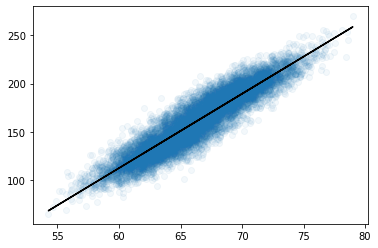

In [32]:
plt.scatter(X_train_sample, y_train_sample, alpha=0.05)
plt.plot(X_train_sample, (lr_sample.coef_*X_train_sample)+lr_sample.intercept_, c='black')

So? How were we able to plot?

## Coefficients and Intercepts

The intuition behind Linear Regression lies behind the Coefficients and Intercepts.

Some people call the Coefficients to be the Weights (different jargon). This 'Weights' and 'Intercept' is what is being learned during `fit`.

Let's have a quick reminder of our Boston dataset.

In [16]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
325,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
259,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5.0,264.0,13.0,391.93,6.90
126,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.14231,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
222,0.62356,0.0,6.20,1.0,0.507,6.879,77.7,3.2721,8.0,307.0,17.4,390.39,9.93
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81


In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr_coeffs = lr.coef_
lr_coeffs

array([[-1.41797379e-01,  4.04329612e-02,  6.00802566e-02,
         3.65927365e+00, -1.58423938e+01,  4.21698524e+00,
        -2.09253879e-04, -1.23737508e+00,  3.12492465e-01,
        -1.24542412e-02, -8.69559986e-01,  9.24515552e-03,
        -5.29179549e-01]])

In [20]:
words_coeffs_df = pd.DataFrame(data = lr_coeffs.T, index = X.columns, columns=['Coefficients'])
words_coeffs_df

,Coefficients
CRIM,-0.141797
ZN,0.040433
INDUS,0.060080
CHAS,3.659274
NOX,-15.842394
RM,4.216985
AGE,-0.000209
DIS,-1.237375
RAD,0.312492
TAX,-0.012454


CAREFUL : This data has not been scaled. Not having similar measures, makes it hard for comparison.

Without scaling... what do you think would happen if Age was in seconds?

Let’s try to make some sense of it here!

We can use these coefficients to interpret our model. They show us how much each of these features affects our model’s prediction.

For example, if we had a house with 2 RM (number of rooms per dwelling), our RM value is 2. That means that $2*3.854$ will be contributed to our predicted price. 

The negative coefficients work in the opposite way, if we have a house where DIS (weighted distances to five Boston employment centres) is 10, that would contribute $10*-1.3726$ to our house price.

**IMPORTANT**
In linear models:

* if the coefficient is +, then ↑ the feature values ↑ the prediction value.
* if the coefficient is -, then ↑ the feature values ↓ the prediction value.
* if the coefficient is 0, the feature is not used in making a prediction.

## Predicting

In [21]:
item = X_train.iloc[0:1]
item

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
325,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08


In [22]:
lr.predict(item)

array([[25.08446435]])

## Prediction By Hand

In [23]:
pd.DataFrame(data = lr_coeffs, columns = X_train.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.141797,0.040433,0.06008,3.659274,-15.842394,4.216985,-0.000209,-1.237375,0.312492,-0.012454,-0.86956,0.009245,-0.52918


In [24]:
(lr_coeffs * item).sum(axis=1) + lr.intercept_

325    25.084464
dtype: float64

## Real Value From Label

In [25]:
y_train.iloc[0:1]

,TARGET
325,24.6


## Results interpretation

- Weights (coef of variables)
- Bias (coef of constant)

- **R-squared** measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model
- **Adjusted R-squared** adjusts the statistic based on the number of independent variables in the model

$R^2 = 1 - \frac{RSS}{TSS}$

$R^2	=	$   coefficient of determination    
$RSS	=	$  sum of squares of residuals   
$TSS	=	$   total sum of squares   $=\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}$

The sum of squares measures how much variation there is in the modelled values and this is compared to the total sum of squares (TSS), which measures how much variation there is in the observed data, and to the residual sum of squares, which measures the variation in the error between the observed data and modelled values.

In [27]:
lr.score(X_test, y_test)

0.6913385956306004

## Underneath the Hood

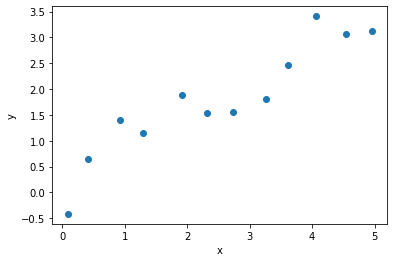

In [39]:
n = 12
d = 2

x = np.linspace(0,5,n)  + np.random.randn(n)*0.05
y = x*0.7 + np.random.randn(n)*0.5
X = x[:,None]

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y');

In [40]:
# function that I need for later
def make_plot(lr, x, y):
    grid = np.linspace(np.min(x)-0.3,np.max(x)+.3,1000)[:,None]

    plt.scatter(x, y, label="training data")
    plt.xlabel('x')
    plt.ylabel('y');
    plt.plot(grid, lr.predict(grid), 'black', label="model")
    
    yhat = lr.predict(x[:,None])
#     plt.scatter(x, yhat, label="training predictions")
    for i in range(len(y)):
        if i == 0:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red', label="residuals")
        else:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red')

    plt.legend(fontsize=12)    

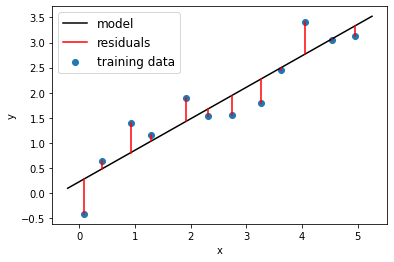

In [41]:
lr = LinearRegression()
lr.fit(X, y);
make_plot(lr, x, y)

## Polynomial regression

### Non-linear regression motivation
- Linear regression might seem rather limited. 
- What if the true relationship between the target and the features is non-linear? 

- Example: $X = \begin{bmatrix}x_1\\0.86 \\ 0.02 \\ -0.42 \end{bmatrix}$ to $Z = \begin{bmatrix}x_0 & x_1 & x_1^2\\ 1 & 0.86 & 0.74\\ 1 & 0.02 & 0.0004\\ 1 & -0.42 & 0.18\\ \end{bmatrix}$

**We still use the linear regression framework, but create quadratic, cubic etc. features**

## Let's see an example

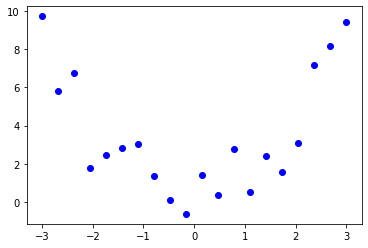

In [42]:
n = 20
X = np.linspace(-3,3,n)
y = X**2 + np.random.randn(n)

# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(X, y, color='blue');

## Fitting a linear regression line

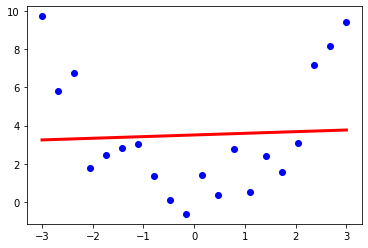

In [43]:
lr = LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='red', linewidth=3)

## Using polynomial features

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
deg = 2
poly_feats = PolynomialFeatures(degree=deg)
X_deg = poly_feats.fit_transform(X)
X_poly_feat_names = poly_feats.get_feature_names(['x'+ str(i) for i in range(1,deg)])
df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
df_poly['y'] = y
df_poly.head()

,1,x1,x1^2,y
0,1.0,-3.000000,9.000000,9.716554
1,1.0,-2.684211,7.204986,5.804812
2,1.0,-2.368421,5.609418,6.771226
3,1.0,-2.052632,4.213296,1.787158
4,1.0,-1.736842,3.016620,2.458392


## Fitting polynomial features
- Discuss overfit vs. underfit

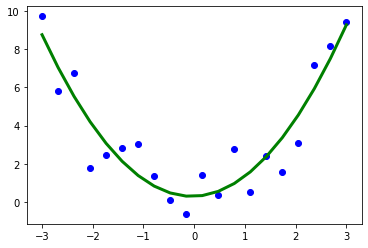

In [46]:
lr_poly = LinearRegression()
lr_poly.fit(X_deg, y)
preds = lr_poly.predict(X_deg)
plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='green', linewidth=3);